### import libraries

In [1]:
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import numpy as np

import pandas as pd
import matplotlib as plot
import glob as glob

### define path to data & import data

In [2]:
path = '../data' # outside this folder there is another folder where all the data is stored
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

../data/documents_categories.csv
../data/documents_topics.csv
../data/clicks_train.csv
../data/clicks_test.csv
../data/page_views_sample.csv
../data/documents_meta.csv
../data/promoted_content.csv
../data/events.csv


/Users/nicolaepetridean/jde/projects/content_recommend_eda/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


../data/documents_entities.csv


### merge data : click with events

In [3]:
train_csv = '../data/clicks_train.csv'
events_csv = '../data/events.csv'

train_data = pd.read_csv(train_csv)
events_info = pd.read_csv(events_csv)
merged_train_data = train_data.merge(events_info, on="display_id", how="outer").fillna("")

In [4]:
merged_train_data.info()
train_data.info()
events_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93387264 entries, 0 to 93387263
Data columns (total 8 columns):
display_id      int64
ad_id           object
clicked         object
uuid            object
document_id     int64
timestamp       int64
platform        object
geo_location    object
dtypes: int64(3), object(5)
memory usage: 6.3+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87141731 entries, 0 to 87141730
Data columns (total 3 columns):
display_id    int64
ad_id         int64
clicked       int64
dtypes: int64(3)
memory usage: 1.9 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23120126 entries, 0 to 23120125
Data columns (total 6 columns):
display_id      int64
uuid            object
document_id     int64
timestamp       int64
platform        object
geo_location    object
dtypes: int64(3), object(3)
memory usage: 1.0+ GB


In [6]:
merged_train_data.tail(10)

,display_id,ad_id,clicked,uuid,document_id,timestamp,platform,geo_location
93387254,23120117,,,656cedaf95c5d0,2985645,1295999360,1,US>TX>618
93387255,23120118,,,f9e31a6bab2578,310779,1295999547,2,US>NY>538
93387256,23120119,,,31a19347301c57,1788295,1295999563,1,US>TX>600
93387257,23120120,,,ca33f12ef839dd,2306525,1295999567,1,US>IL>609
93387258,23120121,,,176f586048741e,1347238,1295999569,2,CA>AB
93387259,23120122,,,3b42aaa4aa8993,1827718,1295999574,1,US>FL>571
93387260,23120123,,,7efccdc2d58fd1,2984543,1295999591,2,US>TX>623
93387261,23120124,,,11f9ac8cee26f2,751048,1295999657,2,US>GA>524
93387262,23120125,,,6bbdc5756789cc,744496,1295999771,2,US>MI>505
93387263,23120126,,,b545c100626cba,2357447,1295999805,2,US>SD>764


In [7]:
merged_train_data["ad_id"].nunique() #unique advertisements ids
#events_info["document_id"].nunique()

478951

### merge also test data with events info

In [25]:
merged_test_data = test_data.merge(events_info, on="display_id", how="outer").fillna("")

In [28]:
merged_test_data.tail(10)

,display_id,ad_id,uuid,document_id,timestamp,platform,geo_location
49099745,16874584,,94680f981bf165,2311552,1123198843,2,US>OH>535
49099746,16874585,,6c23d6809274d4,479781,1123198914,2,CA>AB
49099747,16874586,,1931d00a6f2830,2799635,1123199143,2,US>TX>635
49099748,16874587,,f82df924309e8b,161824,1123199167,2,US>CA>825
49099749,16874588,,1bf30bbd832319,2822648,1123199298,2,US>VA>511
49099750,16874589,,d2c47d8183e37b,876520,1123199313,3,US>TN>557
49099751,16874590,,4032cf074d74a3,2819923,1123199470,3,US>NM>790
49099752,16874591,,49396799cb3a40,2816969,1123199601,1,US>IN>582
49099753,16874592,,45f3b28fd8f19d,2823420,1123199635,2,GB
49099754,16874593,,21f03d8a66e702,2777166,1123199936,2,US>NJ>501


### read also test data to be able to check distribution against train data.

In [9]:
train_csv = '../data/clicks_test.csv'
test_data = pd.read_csv(train_csv)

In [12]:
test_data.info
train_data.info

<bound method DataFrame.info of           display_id   ad_id  clicked
0                  1   42337        0
1                  1  139684        0
2                  1  144739        1
3                  1  156824        0
4                  1  279295        0
...              ...     ...      ...
87141726    16874592  186600        0
87141727    16874593  151498        1
87141728    16874593  282350        0
87141729    16874593  521828        0
87141730    16874593  522693        0

[87141731 rows x 3 columns]>

### comparing the distribution on clicks vs hours, to check test vs. train data 

In [31]:
p = sns.color_palette()
print(p)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


Text(0, 0.5, 'Proportion of set')

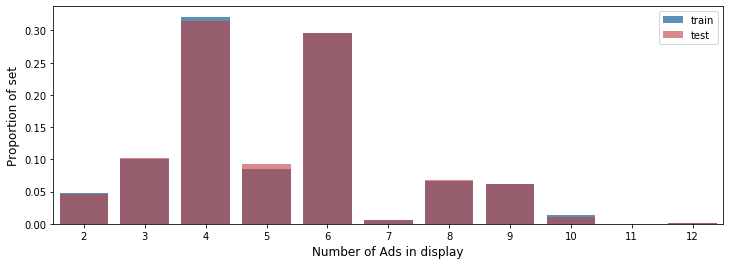

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
train_ads_per_display = train_data.groupby('display_id')['ad_id'].count().value_counts()
test_ads_per_display = test_data.groupby('display_id')['ad_id'].count().value_counts()
train_ads_per_display = train_ads_per_display / np.sum(train_ads_per_display)
test_ads_per_display = test_ads_per_display / np.sum(test_ads_per_display)

plt.figure(figsize=(12,4))
sns.barplot(train_ads_per_display.index, train_ads_per_display.values, alpha=0.8, color=p[0], label='train')
sns.barplot(test_ads_per_display.index, test_ads_per_display.values, alpha=0.6, color=p[3], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

### Add distribution per display seems to be ok.
### Now checking the again the distribution per region.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
merged_train_data_disp = merged_train_data.groupby('display_id')['geo_location'].count().value_counts()
merged_test_data_disp = merged_test_data.groupby('display_id')['geo_location'].count().value_counts()
merged_train_data_disp = merged_train_data_disp / np.sum(merged_train_data_disp)
merged_test_data_disp = merged_test_data_disp / np.sum(merged_test_data_disp)

plt.figure(figsize=(12,4))
sns.barplot(merged_train_data_disp.index, merged_train_data_disp.values, alpha=0.8, color=p[0], label='train')
sns.barplot(merged_test_data_disp.index, merged_test_data_disp.values, alpha=0.6, color=p[8], label='test')
plt.legend()
plt.xlabel('Number of Ads in display', fontsize=12)
plt.ylabel('Proportion of set', fontsize=12)

### so the distribution on geo_location in between test and dev is not quite the same